# Image segmentation of ILSVRC2015 test set #

In [2]:
import cv2
import skimage
import matplotlib.pyplot as plt
import numpy as np
import caffe
%matplotlib inline

In [2]:
def read_mean_file(path):
    
    blob_mean_file = caffe.proto.caffe_pb2.BlobProto()
    mean_file = open(path, 'rb' ).read()
    blob_mean_file.ParseFromString(mean_file)
    mean_npy = np.array(caffe.io.blobproto_to_array(blob_mean_file)) # ASSUMED IN BGR
    
    return mean_npy

## Sample image path ##

In [103]:
imagePath = "/home/nvidia/data/ILSVRC2015/Data/CLS-LOC/test/ILSVRC2012_test_00000002.JPEG"

## Felzenszwalb, SLIC and Quickshift ##
### (Felzenszwalb has poor performance, Quickshift is slow)
### SLIC is superior ###

In [146]:
img = cv2.imread(imagePath)

roi = img[0:img.shape[0], 0:img.shape[1]]
combine = cv2.bitwise_and(roi, roi, mask=255 - edges)

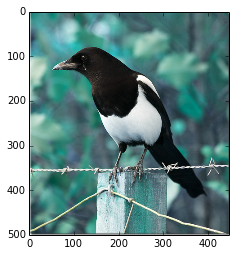

In [147]:
plt.imshow(img)

In [165]:
from skimage.segmentation import felzenszwalb, slic, quickshift
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
from skimage import color

img = io.imread(imagePath)
resized = cv2.resize(img.copy(), (256, 256))
if len(img.shape) != 3:
    img = cv2.imread(imagePath)

# segments_fz = felzenszwalb(img.copy(), scale=100, sigma=0.5, min_size=50)
segments_slic = slic(img.copy(), n_segments=10, compactness=30, sigma=10)
segments_slic_resized = slic(resized.copy(), n_segments=10, compactness=30, sigma=10)
# segments_quick = quickshift(img.copy(), kernel_size=29, max_dist=20, ratio=0.5)

# print("Felzenszwalb's number of segments: %d" % len(np.unique(segments_fz)))
print("Slic number of segments: %d" % len(np.unique(segments_slic)))
print("Slic number of segments: %d" % len(np.unique(segments_slic_resized)))
# print("Quickshift number of segments: %d" % len(np.unique(segments_quick)))

Slic number of segments: 9
Slic number of segments: 9


In [ ]:
plt.imshow(img)
plt.show()
plt.imshow(resized)
plt.show()
plt.imshow(segments_slic)
plt.show()
plt.imshow(segments_slic_resized)
plt.show()

In [167]:
bounded = mark_boundaries(np.zeros(resized.shape), segments_slic_resized).astype(np.uint8)
w, h = bounded.shape[0], bounded.shape[1]
cv2.rectangle(bounded, (0, 0), (h, w), (255, 255, 255), 5)
boundedGray = cv2.cvtColor(bounded.copy(), cv2.COLOR_BGR2GRAY)
contours, hierarchy = cv2.findContours(boundedGray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

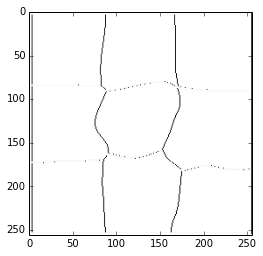

In [204]:
plt.imshow(boundedGray, cmap=plt.cm.Greys)

In [322]:
results = []
for contour in contours:

    result = original.copy()
    
    # Get rectangle bounding coordinates
    [x, y, w, h] = cv2.boundingRect(contour)
    
    # Discard areas that are too small
    if h < 30 or w < 30:
        continue
    
#     cv2.rectangle(result, (x, y), (x + w, y + h), (0, 255, 0), 2)
    results.append(result[y:y + h, x:x + w])

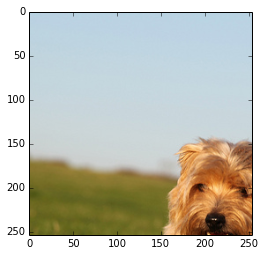

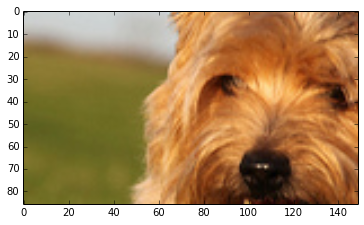

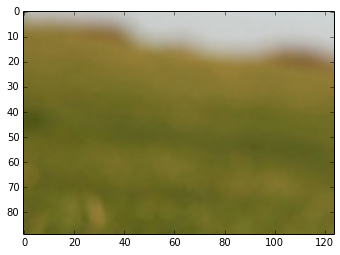

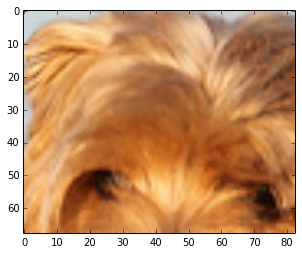

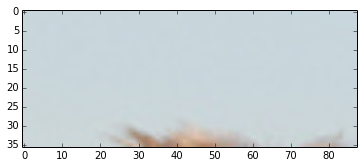

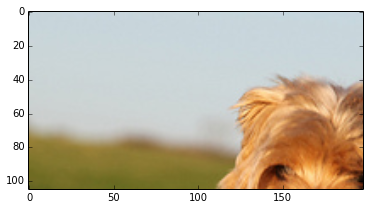

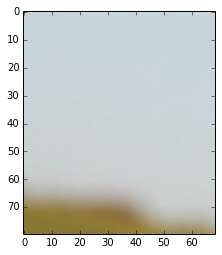

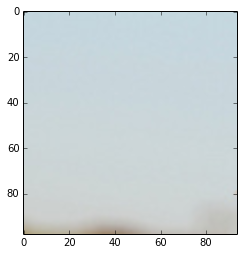

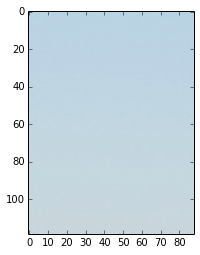

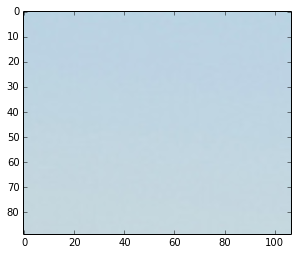

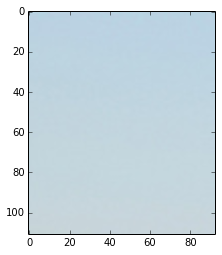

In [323]:
for index, result in enumerate(results):
    plt.figure(index + 1)
    plt.imshow(result)
plt.show()

## Apply SLIC to a set of segment ##

Slic number of segments: 1


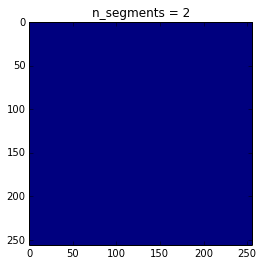

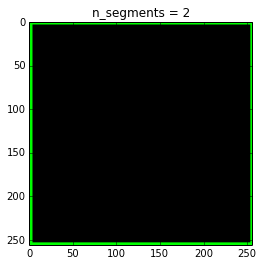

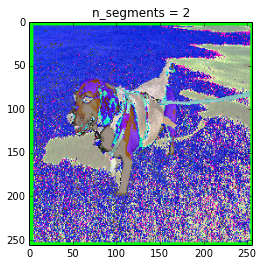

Slic number of segments: 4


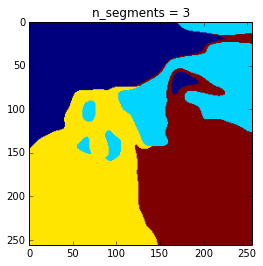

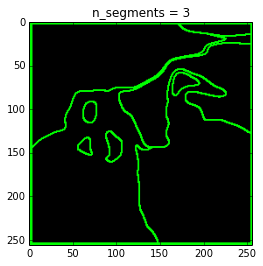

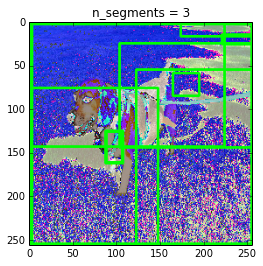

Slic number of segments: 4


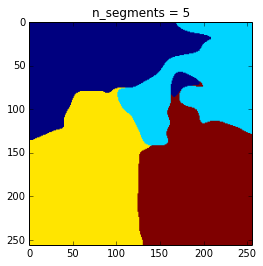

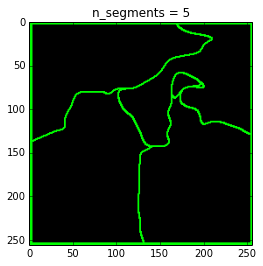

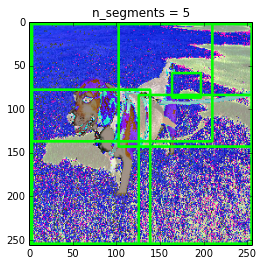

Slic number of segments: 9


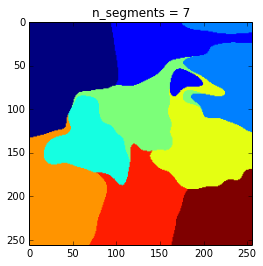

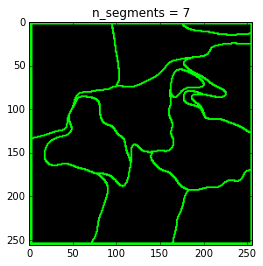

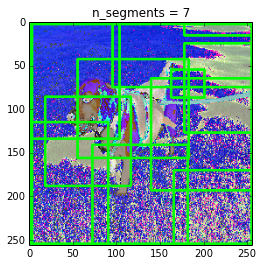

Slic number of segments: 9


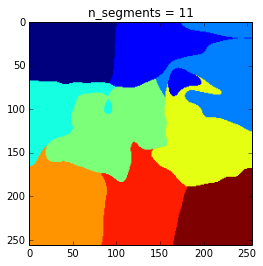

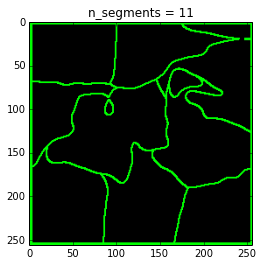

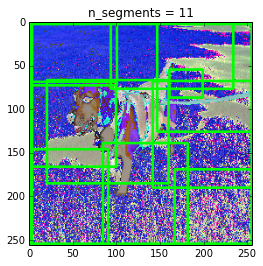

Slic number of segments: 16


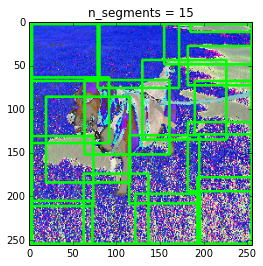

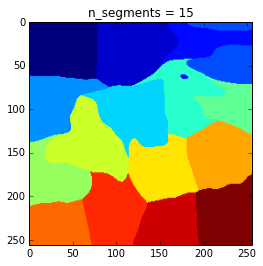

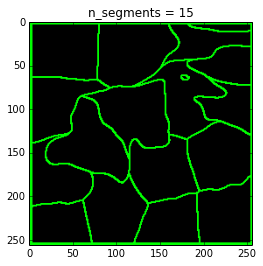

In [23]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage import io

segments = [2, 3, 5, 7, 11, 15]
resizeVal = (256, 256)
segmented_crops = []

imagePath = "/home/nvidia/data/ILSVRC2015/Data/CLS-LOC/test/ILSVRC2012_test_00034537.JPEG"
original = img = io.imread(imagePath)

## Read image
img = io.imread(imagePath)
if len(img.shape) != 3:
    img = cv2.imread(imagePath)
    
## Resize image
img = cv2.resize(img, resizeVal)

## Find mean and subtract from img
mean_npy = read_mean_file('/home/nvidia/imagenet_lmdb/mean.binaryproto')
mean_npy = np.squeeze(mean_npy, axis = 0).swapaxes(0, 2).swapaxes(0, 1)
img = img.astype(np.float32)
img = img - mean_npy
img = img.astype(np.uint8)

for index, segment in enumerate(segments):
    ## Apply SLIC
    segments_slic = slic(img.copy(), n_segments=segment, compactness=50, sigma=7)
    print("Slic number of segments: %d" % len(np.unique(segments_slic)))

    ## Draw boundaries upon a black image
    bounded = mark_boundaries(np.zeros(img.shape), segments_slic, 
                          color=(0, 255, 0), outline_color=(0, 255, 0)).astype(np.uint8)
    
    ## Draw corners of the black image
    w, h = bounded.shape[0], bounded.shape[1]
    cv2.rectangle(bounded, (0, 0), (h, w), (0, 255, 0), 5)
    
    ## Show clustered images
    plt.figure(index + 1)
    plt.imshow(segments_slic)
    plt.title("n_segments = {}".format(segments[index]))
    
    ## Show black-yellow images
    plt.figure(index + 2)
    plt.imshow(bounded)
    plt.title("n_segments = {}".format(segments[index]))
    
    ## Find contours
    boundedGray = cv2.cvtColor(bounded.copy(), cv2.COLOR_BGR2GRAY)
    contours, hierarchy = cv2.findContours(boundedGray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    ## Draw bounding rectangle of the contours
    result = img.copy()
    for contour in contours:
        # Get rectangle bounding coordinates
        [x, y, w, h] = cv2.boundingRect(contour)
        
        # Discard areas that are too small
        if h < 30 and w < 30:
            continue
            
        cv2.rectangle(result, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        plt.figure(index + 3)
        plt.imshow(result)
        plt.title("n_segments = {}".format(segments[index]))
    
    plt.show()
       
plt.show()

## Apply SLIC to all test images ##

In [30]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage import io
import os
import numpy as np
import multiprocessing as mp

segments = [2, 3, 5, 7, 11, 15]
resizeVal = (256, 256)

imageDirPath = "/home/nvidia/data/ILSVRC2015/Data/CLS-LOC/val/"
val = np.loadtxt('../imagenet2015_onur/all_labels/validation/val.txt', dtype = 'str')[:, 0]

def segment(imageName):
    
    ## Segmented crops
    segmented_crops = []
    
    ## Result list. First element is image name, second element is segment coordinates.
    segmented_results = [[imageName], ]
    
    ## Image path
    imagePath = imageDirPath + imageName
    
    ## Read image
    img = io.imread(imagePath)
    if len(img.shape) != 3:
        img = cv2.imread(imagePath)

    ## Resize image
    img = cv2.resize(img, resizeVal)
    
    ## Find mean and subtract from img
    mean_npy = read_mean_file('/home/nvidia/imagenet_lmdb/mean.binaryproto')
    mean_npy = np.squeeze(mean_npy, axis = 0).swapaxes(0, 2).swapaxes(0, 1)
    img = img.astype(np.float32)
    img = img - mean_npy
    img = img.astype(np.uint8)

    for index, segment in enumerate(segments):
        ## Apply SLIC
        segments_slic = slic(img.copy(), n_segments=segment, compactness=50, sigma=7)

        ## Draw boundaries upon a black image
        bounded = mark_boundaries(np.zeros(img.shape), segments_slic, 
                              color=(0, 255, 0), outline_color=(0, 255, 0)).astype(np.uint8)

        ## Draw corners of the black image
        w, h = bounded.shape[0], bounded.shape[1]
        cv2.rectangle(bounded, (0, 0), (h, w), (0, 255, 0), 5)

        ## Find contours
        boundedGray = cv2.cvtColor(bounded.copy(), cv2.COLOR_BGR2GRAY)
        contours, hierarchy = cv2.findContours(boundedGray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        ## Draw bounding rectangle of the contours
        for contour in contours:
            # Get rectangle bounding coordinates
            [x, y, w, h] = cv2.boundingRect(contour)
            
            # Discard areas that are too small
            if h < 10 and w < 10:
                continue
            
            segmented_crops.append([y, y + h, x, x + w])
            
    segmented_results.append(segmented_crops)
    
    return segmented_results


In [31]:
pool = mp.Pool(processes=40)
# slic_results_test_full_oversegmented_sigma_7 = pool.map(segment, os.listdir(imageDirPath))
slic_results_val_full_oversegmented_sigma_7 = pool.map(segment, val)

In [32]:
import cPickle
with open("Validation_Localization_SLIC_Outputs_oversegmented_sigma_7.pkl", "w") as f:
    cPickle.dump(slic_results_val_full_oversegmented_sigma_7, f)

In [277]:
tt = []
for index, slic_result in enumerate(slic_results_full):
    temp = []
    temp.append(slic_result[0][0])
    for ss in slic_result[1]:
        temp.append(ss)
    tt.append(temp)

In [280]:
tn = np.array(tt)

In [281]:
np.savetxt("segmented_crops_coordinates.txt", tn, fmt="%s")

In [292]:
aa = np.loadtxt("segmented_crops_coordinates.txt", delimiter='\n', dtype="str")

## Edge detector ##

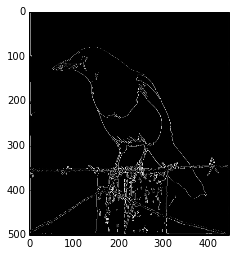

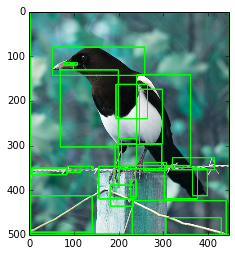

In [16]:
imagePath = "/home/nvidia/data/ILSVRC2015/Data/CLS-LOC/test/ILSVRC2012_test_00000002.JPEG"

img = cv2.imread(imagePath)

## Draw corners of the black image
w, h = img.shape[0], img.shape[1]
cv2.rectangle(img, (0, 0), (h, w), (0, 255, 0), 5)

## Convert gray
gray = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)

## Apply threshold
ret, thresh = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

## Remove noise 
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh.copy(), cv2.MORPH_OPEN, kernel, iterations=2)

edges = cv2.Canny(gray.copy(), 100, 200)

## Draw corners of the black image
w, h = img.shape[0], img.shape[1]
cv2.rectangle(edges, (0, 0), (h, w), (255, 255, 255), 5)

## Find contours
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
## Draw bounding rectangle of the contours
result = img.copy()
for contour in contours:
    # Get rectangle bounding coordinates
    [x, y, w, h] = cv2.boundingRect(contour)

    # Discard areas that are too small
    if h < 30 and w < 30:
        continue

    cv2.rectangle(result, (x, y), (x + w, y + h), (0, 255, 0), 2)

# roi = img[0:img.shape[0], 0:img.shape[1]]
# combine = cv2.bitwise_and(roi, roi, mask=255-edges)

plt.imshow(edges, cmap=plt.cm.Greys_r)
plt.show()
plt.imshow(result)
plt.show()

## Watershed ##

In [ ]:
## Convert gray
gray = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)

## Apply threshold
ret, thresh = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

## Remove noise 
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh.copy(), cv2.MORPH_OPEN, kernel, iterations=2)

## Sure background area
sure_bg = cv2.dilate(opening.copy(), kernel, iterations=3)

# Find sure foreground area
dist_transform = cv2.distanceTransform(opening.copy(), cv2.DIST_L1, 5)
ret, sure_fg = cv2.threshold(dist_transform.copy(), 0.7 * dist_transform.max(), 255, 0)

# Find unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg.copy(), sure_fg.copy())

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg.copy())

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Now, mark the region of unknown with zero
markers[unknown == 255] = 0

markers = cv2.watershed(img, markers)
# img[markers == -1] = [255, 0, 0]

## Plot watershed ##

In [ ]:
plt.subplot(3, 3, 1), plt.imshow(img, cmap=cm.Pastel1), plt.title("original"), plt.xticks([]), plt.yticks([])
plt.subplot(3, 3, 2), plt.imshow(gray, cmap=cm.Greys_r), plt.title("grey"), plt.xticks([]), plt.yticks([])
plt.subplot(3, 3, 3), plt.imshow(thresh, cmap=cm.Greys), plt.title("thresh"), plt.xticks([]), plt.yticks([])
plt.subplot(3, 3, 4), plt.imshow(opening, cmap=cm.Greys), plt.title("opened"), plt.xticks([]), plt.yticks([])
plt.subplot(3, 3, 5), plt.imshow(sure_bg, cmap=cm.Greys), plt.title("sure_bg"), plt.xticks([]), plt.yticks([])
plt.subplot(3, 3, 6), plt.imshow(sure_fg, cmap=cm.Greys), plt.title("sure_fg"), plt.xticks([]), plt.yticks([])
plt.subplot(3, 3, 7), plt.imshow(dist_transform, cmap=cm.Greys), plt.title("dist_transform"), plt.xticks([]), plt.yticks([])
plt.subplot(3, 3, 8), plt.imshow(unknown, cmap=cm.Greys), plt.title("unknown"), plt.xticks([]), plt.yticks([])
plt.subplot(3, 3, 9), plt.imshow(markers, cmap=cm.Greys), plt.title("result"), plt.xticks([]), plt.yticks([])

## Skimage watershed ##

In [ ]:
from scipy import ndimage
import matplotlib.pyplot as plt

from skimage.morphology import watershed, disk
from skimage.color import rgb2gray
from skimage.filter import rank
from skimage.util import img_as_ubyte

## Read image
img = skimage.io.imread("n02090379/n02090379_10006.JPEG")

## Convert into gray
gray = rgb2gray(img.copy())

# denoise image
denoised = rank.median(gray.copy(), disk(2))

# find continuous region (low gradient) --> markers
markers = rank.gradient(denoised.copy(), disk(5)) < 10
markers = ndimage.label(markers)[0]

#local gradient
gradient = rank.gradient(denoised.copy(), disk(2))

# process the watershed
labels = watershed(gradient.copy(), markers.copy())

## Plot skimage watershed ##

In [ ]:
plt.subplot(3, 2, 1), plt.imshow(img, cmap=cm.RdYlBu), plt.title("original"), plt.xticks([]), plt.yticks([])
plt.subplot(3, 2, 2), plt.imshow(gray, cmap=cm.Greys_r), plt.title("gray"), plt.xticks([]), plt.yticks([])
plt.subplot(3, 2, 3), plt.imshow(denoised, cmap=cm.Greys), plt.title("denoised"), plt.xticks([]), plt.yticks([])
plt.subplot(3, 2, 4), plt.imshow(markers, cmap=cm.Greys), plt.title("markers"), plt.xticks([]), plt.yticks([])
plt.subplot(3, 2, 5), plt.imshow(gradient, cmap=cm.Greys), plt.title("gradient"), plt.xticks([]), plt.yticks([])
plt.subplot(3, 2, 6), plt.imshow(labels, cmap=cm.Greys), plt.title("labels"), plt.xticks([]), plt.yticks([])